In [14]:
%matplotlib inline
%config InlineBackend.figure_format = "svg"

from __future__ import print_function

import sys, os
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

In [2]:
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20
rcParams["figure.figsize"] = [8, 5]
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans Serif"]
rcParams["text.usetex"] = True

In [5]:
import planetplanet as pp
from planetplanet.constants import *

In [4]:
# Instantiate the star
star = pp.Star('star', m = 0.1, r = 0.1, nz = 31, color = 'k', 
               limbdark = [0.4, 0.26])

# Planet b
planet = pp.Planet('planet', m = 1, per = 0.5, inc = 90.4, r = 2., t0 = 0, 
                   nz = 1, Omega = 0, w = 0., ecc = 0., phasecurve = False)

In [34]:
# Compute the light curve, no optimization
system = pp.System(star, planet)
time = np.arange(-0.025, 0.025, 0.1 * MINUTE)
system.compute(time, lambda1 = 3.0, lambda2 = 33.0)
flux = system.star.flux[:,0] / system.star.flux[0,0]

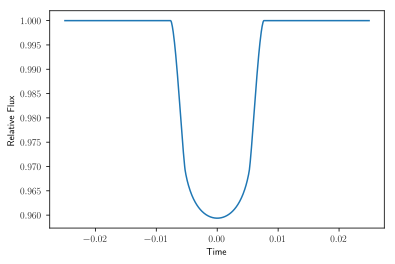

In [35]:
fig, ax = plt.subplots()
ax.set_xlabel(r"Time")
ax.set_ylabel(r"Relative Flux")
ax.plot(system.star.time, flux, label = 'planetplanet')

Computing observed light curve in F1280W filter...
Average lightcurve precision: 704.394 ppm
Computing observed light curve in F1500W filter...
Average lightcurve precision: 845.454 ppm
Computing observed light curve in F1800W filter...
Average lightcurve precision: 1498.629 ppm


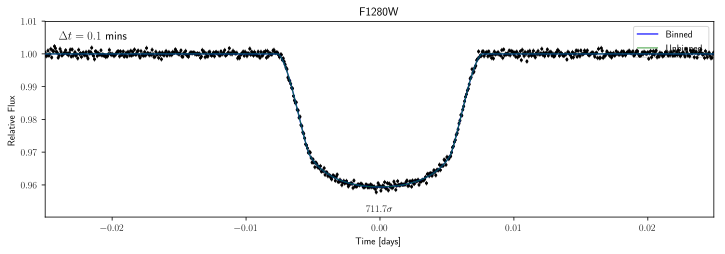

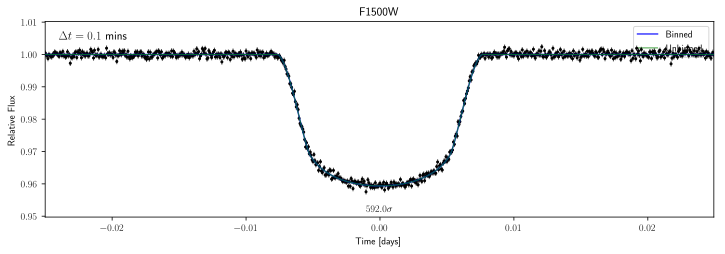

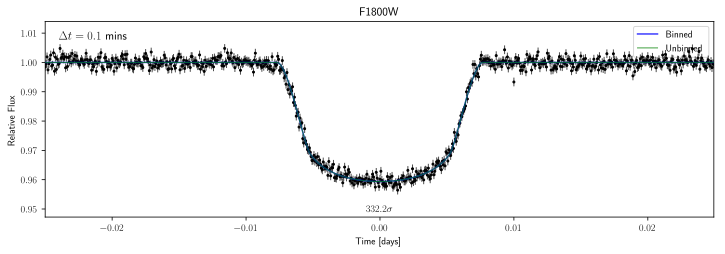

In [36]:
fig, ax = system.observe(stack = 1, filter = 'f1280w', instrument = 'jwst', time_unit='days')
fig, ax = system.observe(stack = 1, filter = 'f1500w', instrument = 'jwst', time_unit='days')
fig, ax = system.observe(stack = 1, filter = 'f1800w', instrument = 'jwst', time_unit='days')

<ErrorbarContainer object of 3 artists>

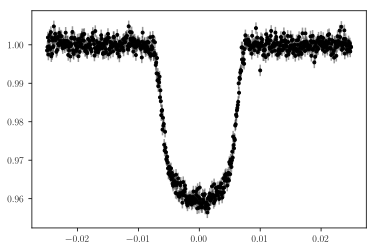

In [38]:
# Here's how you access the quantities plotted above:
plt.errorbar(system.filter.lightcurve.time, 
             system.filter.lightcurve.obs, 
             yerr = system.filter.lightcurve.sig, 
             fmt = ".k", alpha = 0.4)